In [ ]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Dense, Dropout,Embedding, SimpleRNN,GRU
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
imdb=pd.read_csv("review.csv")

In [ ]:
# imdb
imdb.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
imdb.shape

(999, 3)

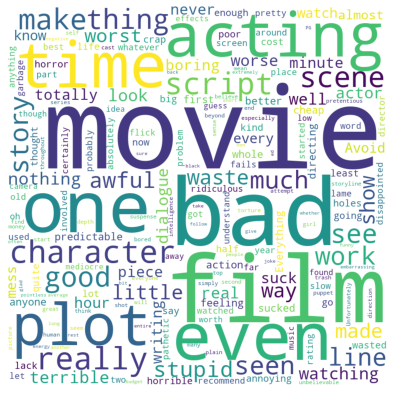

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(''.join(imdb[imdb["sentiment"]==0]["review"]))
  
plt.figure(figsize = (7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

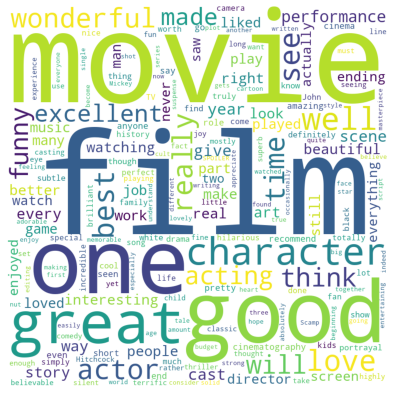

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(''.join(imdb[imdb["sentiment"]==1]["review"]))
  
plt.figure(figsize = (7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [ ]:
# data cleaning
def clean_text(text):
    stop = stopwords.words('english') #stopwords list
    punc = list(punctuation) #punctuation list
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text) # tokenization
    word_tokens = [t for t in tokens if t.isalpha()] # removing numbers 
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [ ]:
imdb["review"] = imdb["review"].apply(clean_text)

In [ ]:
imdb["review"].head()

0    not sure lost flat character audience nearly h...
1    attempting artiness black white clever camera ...
2                     very little music anything speak
3    the best scene movie gerardo trying find song ...
4    the rest movie lack art charm meaning if empti...
Name: review, dtype: object

In [ ]:
x = imdb['review']
y = imdb["sentiment"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
sent_len=[]
for sent in imdb['review']:
    sent_len.append(len(word_tokenize(sent)))
imdb['sent_len'] = sent_len
imdb.head()    

,Unnamed: 0,review,sentiment,sent_len
0,0,not sure lost flat character audience nearly h...,0,9
1,1,attempting artiness black white clever camera ...,0,17
2,2,very little music anything speak,0,5
3,3,the best scene movie gerardo trying find song ...,1,11
4,4,the rest movie lack art charm meaning if empti...,0,13


In [ ]:
max(sent_len)

39

In [ ]:
np.quantile(sent_len,0.95)

18.0

In [ ]:
# We can see that 95% review text are of lengths less than or equal to 18. We'll keep the max length to 18

In [ ]:
max_len = 18

In [ ]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')

tok.fit_on_texts(x_train)

In [ ]:
tok.index_word

{1: 'i',
 2: 'movie',
 3: 'the',
 4: 'film',
 5: 'it',
 6: 'this',
 7: 'one',
 8: 'bad',
 9: 'character',
 10: 'good',
 11: 'like',
 12: 'time',
 13: 'even',
 14: 'acting',
 15: 'really',
 16: 'great',
 17: 'well',
 18: 'scene',
 19: 'see',
 20: 'story',
 21: 'make',
 22: 'actor',
 23: 'best',
 24: 'work',
 25: 'but',
 26: 'made',
 27: 'could',
 28: 'plot',
 29: 'think',
 30: 'thing',
 31: 'look',
 32: 'ever',
 33: 'seen',
 34: 'script',
 35: 'love',
 36: 'better',
 37: 'way',
 38: 'wonderful',
 39: 'would',
 40: 'year',
 41: 'real',
 42: 'also',
 43: 'there',
 44: 'much',
 45: 'watch',
 46: 'watching',
 47: 'line',
 48: 'performance',
 49: 'part',
 50: 'never',
 51: 'excellent',
 52: 'stupid',
 53: 'show',
 54: 'cast',
 55: 'life',
 56: 'anyone',
 57: 'little',
 58: 'go',
 59: 'a',
 60: 'nothing',
 61: 'get',
 62: 'every',
 63: 'know',
 64: 'give',
 65: 'people',
 66: 'two',
 67: 'if',
 68: 'music',
 69: 'recommend',
 70: 'funny',
 71: 'all',
 72: 'say',
 73: 'pretty',
 74: 'dialogue'

In [ ]:
vocab_len = len(tok.index_word)
vocab_len

2328

In [ ]:
sequences_train = tok.texts_to_sequences(x_train)

In [ ]:
sequences_train

[[3, 198, 133, 869, 24, 134, 118, 84, 338],
 [7, 119, 339, 2, 1, 32, 33],
 [5, 870, 2, 10],
 [25, 340, 199, 44, 871, 341, 342],
 [155,
  872,
  873,
  343,
  3,
  53,
  344,
  156,
  8,
  200,
  13,
  518,
  258,
  3,
  54,
  345,
  346,
  347,
  874,
  258,
  3,
  53],
 [875,
  876,
  32,
  16,
  519,
  201,
  20,
  877,
  348,
  202,
  878,
  879,
  880,
  203,
  881,
  882,
  201,
  120,
  204,
  259],
 [1, 29, 4, 349, 883, 520, 884, 62, 85],
 [3, 205, 9, 206, 1, 260, 885],
 [5, 15, 10, 53, 45],
 [5, 521, 886, 207, 350, 157, 351, 887, 9, 55],
 [888, 889, 890],
 [71, 84, 522, 4, 891, 892, 893, 894, 54],
 [5, 261],
 [1,
  523,
  86,
  8,
  352,
  4,
  133,
  1,
  15,
  11,
  208,
  4,
  8,
  1,
  158,
  7,
  159,
  56,
  27,
  524],
 [1, 895, 121, 135, 8, 72],
 [20, 525, 896, 897, 898, 526, 40, 527, 15, 528, 899, 529, 530, 9, 900],
 [353, 63, 1, 262],
 [3, 34, 34],
 [1, 63, 901, 902, 354, 27, 44, 903, 17, 904],
 [71, 1, 64, 7, 905],
 [355,
  121,
  2,
  531,
  13,
  906,
  1,
  72,
  

In [ ]:
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)

In [ ]:
sequences_matrix_train

array([[  0,   0,   0, ..., 118,  84, 338],
       [  0,   0,   0, ...,   1,  32,  33],
       [  0,   0,   0, ..., 870,   2,  10],
       ...,
       [  0,   0,   0, ...,  13,  41,   2],
       [  0,   0,   0, ...,   1,  27,  58],
       [  0,   0,   0, ...,   5, 455, 813]], dtype=int32)

In [ ]:
# First document
sequences_matrix_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 198, 133, 869,
        24, 134, 118,  84, 338], dtype=int32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(32,activation='tanh'))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 18, 500)           1164500   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                17056     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,182,645
Trainable params: 1,182,645
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(sequences_matrix_train,y_train,batch_size=50,
          epochs=50)

Train on 799 samples
Epoch 1/50
799/799 [==============================] - 2s 2ms/sample - loss: 0.6911
Epoch 2/50
799/799 [==============================] - 1s 698us/sample - loss: 0.5356
Epoch 3/50
799/799 [==============================] - 1s 651us/sample - loss: 0.3276
Epoch 4/50
799/799 [==============================] - 1s 640us/sample - loss: 0.1389
Epoch 5/50
799/799 [==============================] - 1s 662us/sample - loss: 0.0527
Epoch 6/50
799/799 [==============================] - 0s 610us/sample - loss: 0.0268
Epoch 7/50
799/799 [==============================] - 0s 619us/sample - loss: 0.0165
Epoch 8/50
799/799 [==============================] - 0s 574us/sample - loss: 0.0117
Epoch 9/50
799/799 [==============================] - 1s 651us/sample - loss: 0.0087
Epoch 10/50
799/799 [==============================] - 1s 659us/sample - loss: 0.0068
Epoch 11/50
799/799 [==============================] - 1s 669us/sample - loss: 0.0057
Epoch 12/50
799/799 [=======================

In [ ]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [ ]:
sequences_matrix_test

array([[   0,    0,    0, ...,  203,  410,   34],
       [   0,    0,    0, ...,  131,    4,   21],
       [   0,    0,    0, ...,   13,   10,  434],
       ...,
       [   0,    0,    0, ...,    4,   32,   26],
       [   0,    0,    0, ...,   77,  186, 1827],
       [   0,    0,    0, ...,  271, 1820,   39]], dtype=int32)

In [ ]:
y_pred=model.predict(sequences_matrix_test)

In [ ]:
y_pred = np.where(y_pred>=0.5,1,0)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       102
           1       0.65      0.67      0.66        98

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.67      0.67       200

